<div id="container" style="position:relative;">
<div style="float:left"><h1>Shift Swapping Restaurant</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Welcome to this Jupyter Notebook where we delve into the intriguing realm of shift swapping within a restaurant environment. By leveraging the power of data, we aim to gain insights into the dynamics of employee schedules, shift swaps, and the various factors that influence these exchanges.

In this notebook, we'll be working with a comprehensive dataset sourced from 'data/DATA.csv'. The dataset contains a wealth of information, including shift IDs, employee IDs, employee names, shift dates, start and end times, shift durations, request statuses, swap partners, and the reasons behind these swap requests.

To kickstart our analysis, we've loaded the dataset into a Pandas DataFrame named 'df'. This DataFrame provides us with a snapshot of the first few records, allowing us to grasp the structure and content of the data. By meticulously examining this dataset, we'll uncover patterns, correlations, and insights that could potentially optimize the shift management process and enhance overall operational efficiency.

Let's begin our journey into the world of shift swapping within a restaurant and unlock the secrets hidden within the data.

----

There are several libraries you can use to assist in data manipulation, analysis, and visualization. Here are some of the most commonly used libraries for time series analysis:

In [4]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

Load Data:
Load your dataset into a pandas DataFrame:

In [5]:
# Assuming your dataset is in a CSV file named 'shifts.csv'
df = pd.read_csv('data/DATA.csv')
df.head()

,shift_id,employee_id,employee_name,shift_date,start_time,end_time,duration,request_status,swap_with,reason
0,527439304,427701538,Antoni Castelijn,2/17/2022,1:18 PM,12:35 PM,10.07,rejected,Waylin Goosey,Deadline for a project
1,2564017673,5787495462,Trisha Spridgen,10/7/2022,4:39 PM,2:36 AM,7.66,approved,Say McGriffin,Religious observance
2,411626272,4838883633,Casi Gother,8/10/2022,2:49 AM,12:20 PM,1.18,rejected,Marji Biggin,Family emergency
3,2106123841,9097102634,Rainer Werny,6/1/2022,4:57 AM,9:51 PM,7.77,rejected,Bev Sloey,Overtime at another job
4,8426413978,9980748419,Lorettalorna Petz,7/18/2022,4:29 AM,8:59 PM,9.64,pending,Cherry Brockhurst,Celebratory occasion


In [6]:
df.shape

(1000, 10)

>The DataFrame presents us with a glimpse of its organizational structure—consisting of 1000 rows and 10 columns. This preliminary overview enables us to grasp the scale and layout of the data at hand.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shift_id        1000 non-null   int64  
 1   employee_id     1000 non-null   int64  
 2   employee_name   1000 non-null   object 
 3   shift_date      1000 non-null   object 
 4   start_time      1000 non-null   object 
 5   end_time        1000 non-null   object 
 6   duration        1000 non-null   float64
 7   request_status  1000 non-null   object 
 8   swap_with       1000 non-null   object 
 9   reason          1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


- Columns and Data Types:
 
          The DataFrame presents a tableau of columns, each harboring unique insights into the world of shift swapping. The 'shift_id' and 'employee_id' columns, both with integer data types, offer the identifiers that uniquely characterize shifts and employees. The 'employee_name' column, containing object data, carries the names of the dedicated individuals. Shift temporalities are captured by the 'shift_date', 'start_time', and 'end_time' columns, which provide a timeline for shift activities. Additionally, the 'duration' column, encoded as a float, offers a glimpse into the time span of shifts.
             
- Shift Swap Dynamics:
 
         The essence of our analysis resides in the 'request_status', 'swap_with', and 'reason' columns. The 'request_status' column, presented as textual data, likely conveys the current status of shift swap requests—providing insight into successful swaps, pending requests, or denied exchanges. The 'swap_with' column, also in object form, could illuminate the individuals with whom swaps are being negotiated. The 'reason' column delves into the motivations behind swap requests, potentially revealing patterns like personal preferences, scheduling conflicts, or external commitments.  
         
- Data Quality and Completeness:

        The DataFrame reveals itself as a treasure trove of information, devoid of missing values—a testament to its robustness. With each column having a non-null count of 1000, we have a complete dataset at our disposal.   
        
- Potential Pathways:

        As we journey deeper, we can undertake a multitude of analyses. We could decipher peak swapping periods, identify employees with a penchant for swaps, detect trends in request statuses, and categorize reasons driving swap requests.
        
   -----
        

As we continue our exploration of the restaurant shift swapping dataset, we cast a focused gaze on two pivotal aspects: the unique values in the 'request_status' and 'reason' columns. These columns shed light on the negotiation dynamics and motivations driving shift swaps. Let's peer into their contents to glean insights.

In [8]:
print(df['request_status'].unique())
print(df['reason'].unique())


['rejected' 'approved' 'pending']
['Deadline for a project' 'Religious observance' 'Family emergency'
 'Overtime at another job' 'Celebratory occasion'
 'Childcare responsibilities' 'Attending a special event'
 "Doctor's orders" 'Emergency home repair'
 'Shift conflicts with another job' 'Vacation plans' 'Traffic congestion'
 'Unforeseen medical appointment' 'Last-minute travel'
 'Unexpected car breakdown' 'Scheduling error' 'Transportation issues'
 'Personal appointment' 'Late shift at current job' 'Illness'
 'Important meeting']


- Request Status Insights:
  The 'request_status' column unfolds with three distinct values:

    - 'rejected': A swap request that met with a denial.
    - 'approved': Swap requests that garnered the green light for execution.
    - 'pending': Requests that remain in the balance, awaiting a decision.

This array of statuses outlines the life cycle of shift swaps, from the hopeful initiation to the ultimate resolution—whether in favor or against.

- Reasons Behind Swaps:
  The 'reason' column offers a kaleidoscope of motivations fueling shift swap requests. These encompass a range of personal, professional, and unexpected circumstances, including but not limited to:

    - Meeting a 'Deadline for a project'
    - Observing a 'Religious observance'
    - Attending to a 'Family emergency'
    - Engaging in 'Overtime at another job'
    - Participating in a 'Celebratory occasion'
    - Fulfilling 'Childcare responsibilities'
    - Taking part in a 'Special event'
    - Complying with 'Doctor's orders'
    - Tending to 'Emergency home repair'
        ... and a spectrum of other compelling rationales.
This mosaic of reasons underscores the myriad facets of employees' lives that intertwine with their work commitments, creating a complex tapestry of motivations driving shift swaps.

As we sift through this treasure trove of unique values, we are on the precipice of deeper insights. The 'request_status' landscape reflects the dynamics of negotiation and decision-making, while the 'reason' spectrum unveils the multifaceted human stories that shape shift swapping patterns.

Armed with this understanding, we can journey further into the analysis, potentially uncovering patterns between request statuses and reasons, and identifying the most common circumstances driving shift swaps. Let's traverse this trove of data and uncover the narratives hidden within.

----

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Display the first few rows of the DataFrame
print(df.head())


     shift_id  employee_id      employee_name shift_date start_time  end_time  \
0   527439304    427701538   Antoni Castelijn 2022-02-17    1:18 PM  12:35 PM   
1  2564017673   5787495462    Trisha Spridgen 2022-10-07    4:39 PM   2:36 AM   
2   411626272   4838883633        Casi Gother 2022-08-10    2:49 AM  12:20 PM   
3  2106123841   9097102634       Rainer Werny 2022-06-01    4:57 AM   9:51 PM   
4  8426413978   9980748419  Lorettalorna Petz 2022-07-18    4:29 AM   8:59 PM   

   duration request_status          swap_with                   reason  
0     10.07       rejected      Waylin Goosey   Deadline for a project  
1      7.66       approved      Say McGriffin     Religious observance  
2      1.18       rejected       Marji Biggin         Family emergency  
3      7.77       rejected          Bev Sloey  Overtime at another job  
4      9.64        pending  Cherry Brockhurst     Celebratory occasion  


After converted the 'shift_date' column to datetime objects we can consider exploring the following aspects:

- Temporal Patterns: Plot the distribution of shifts over time (e.g., by month, day of the week) to identify any trends or peak periods of shift swapping activity.

- Request Status Analysis: Visualize the distribution of request statuses (rejected, approved, pending) using a bar chart or pie chart to understand the proportion of each status.

- Reasons for Swapping: Create a bar chart or a countplot to visualize the most common reasons behind shift swapping, which can provide insights into employee preferences and external factors impacting swaps.

- Duration Analysis: Explore the distribution of shift durations using a histogram to understand the typical length of shifts and any variations.

- Employee Engagement: Analyze how often each employee engages in shift swaps. This could be represented using a bar chart showing the frequency of swaps per employee.

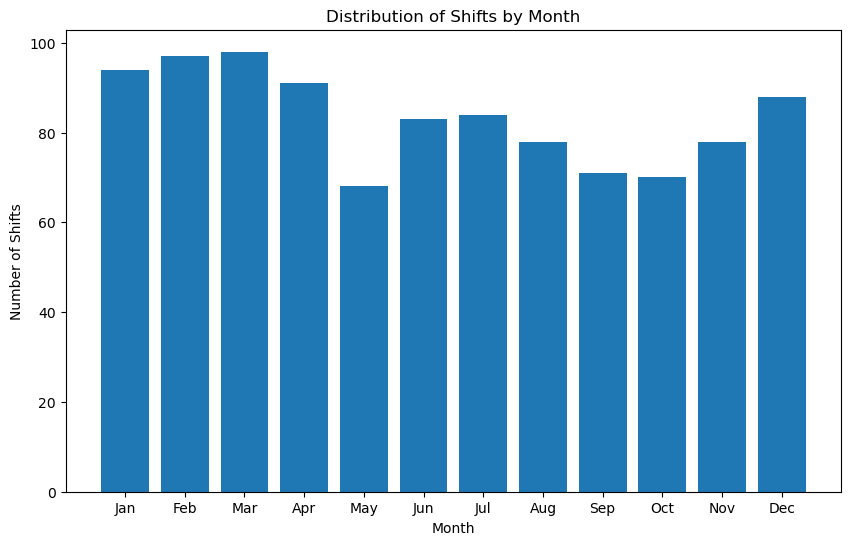

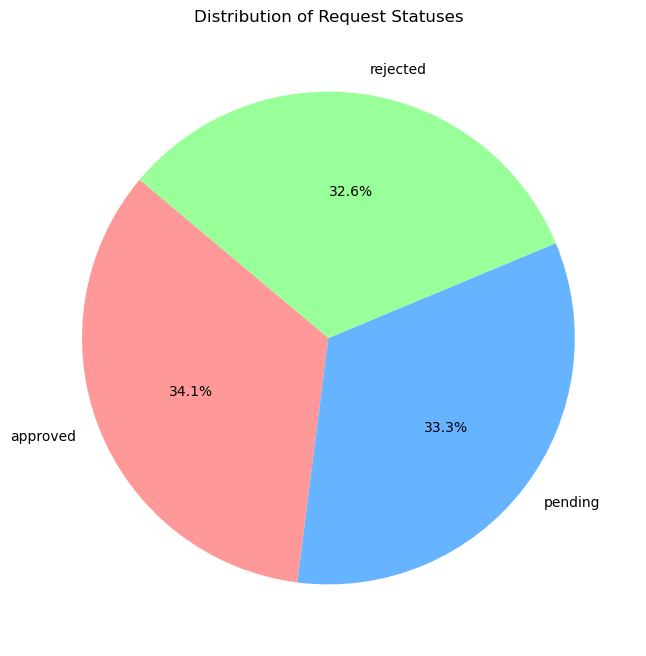

In [10]:
# Temporal Patterns: Shifts by Month
df['shift_month'] = df['shift_date'].dt.month
monthly_shifts = df['shift_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_shifts.index, monthly_shifts.values)
plt.xlabel('Month')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Shifts by Month')
plt.xticks(monthly_shifts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Request Status Analysis
request_statuses = df['request_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(request_statuses, labels=request_statuses.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Request Statuses')
plt.show()


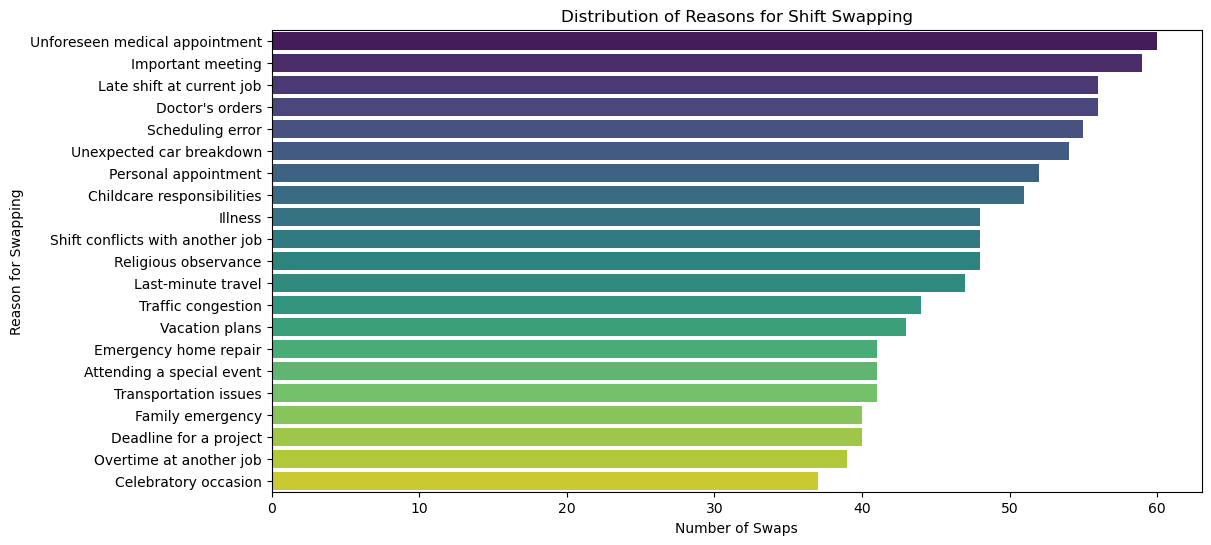

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
reason_counts = df['reason'].value_counts()
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')
plt.xlabel('Number of Swaps')
plt.ylabel('Reason for Swapping')
plt.title('Distribution of Reasons for Shift Swapping')
plt.show()


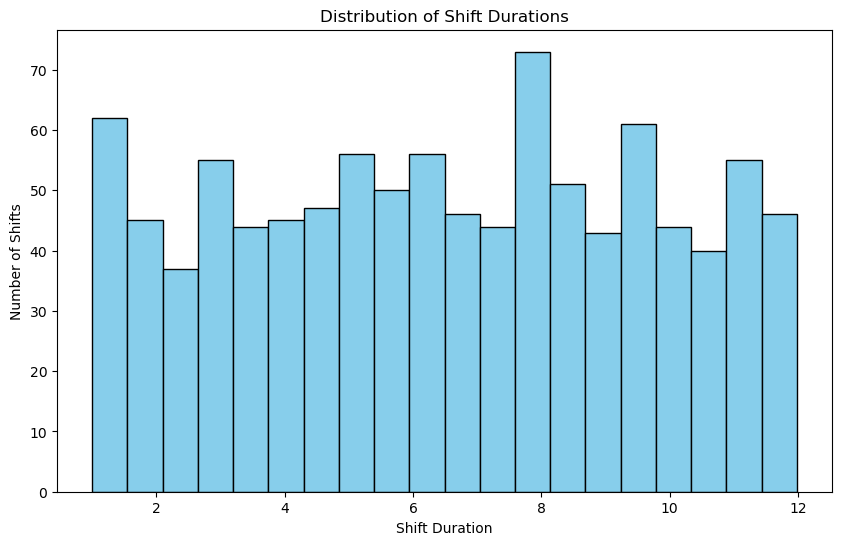

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Shift Duration')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Shift Durations')
plt.show()


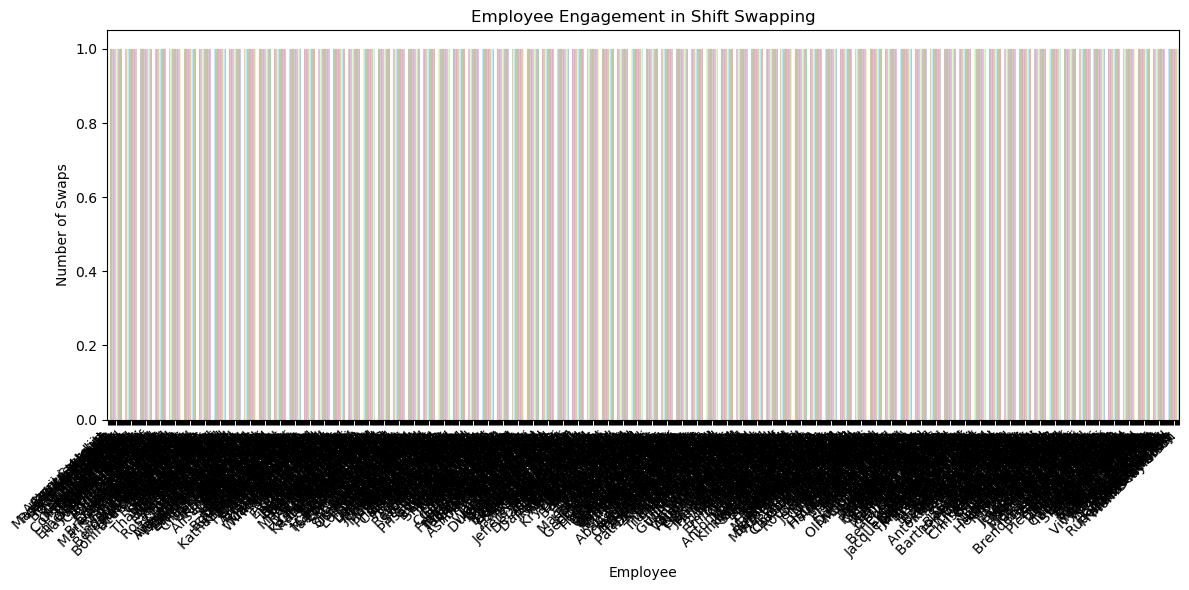

In [13]:
plt.figure(figsize=(12, 6))
employee_swaps = df['employee_name'].value_counts()
sns.barplot(x=employee_swaps.index, y=employee_swaps.values, palette='pastel')
plt.xlabel('Employee')
plt.ylabel('Number of Swaps')
plt.title('Employee Engagement in Shift Swapping')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


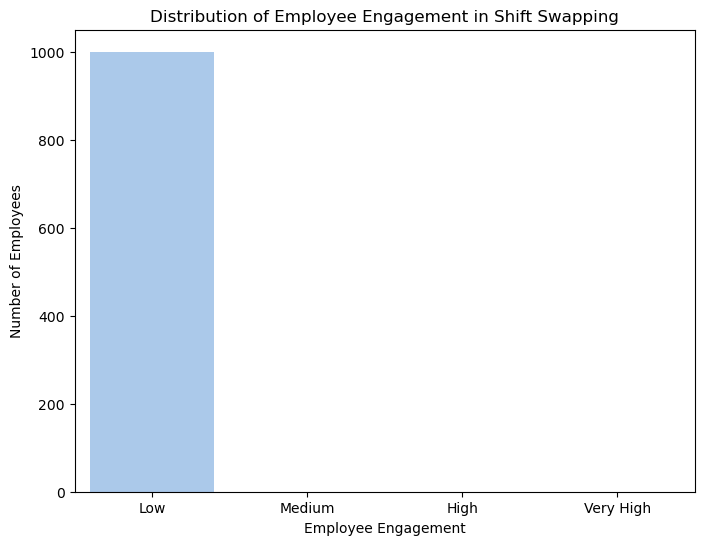

In [14]:
engagement_bins = pd.cut(employee_swaps.values, bins=[0, 5, 10, 20, 100], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 6))
sns.countplot(x=engagement_bins, palette='pastel')
plt.xlabel('Employee Engagement')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Engagement in Shift Swapping')
plt.show()


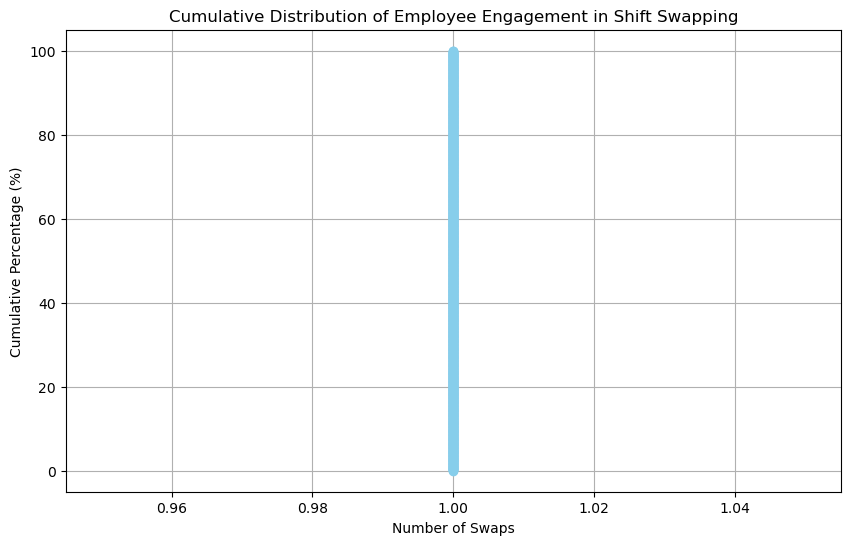

In [15]:
import numpy as np

# Calculate the cumulative percentage
cumulative_percentage = np.arange(1, len(employee_swaps) + 1) / len(employee_swaps) * 100

plt.figure(figsize=(10, 6))
plt.plot(employee_swaps.values, cumulative_percentage, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Number of Swaps')
plt.ylabel('Cumulative Percentage (%)')
plt.title('Cumulative Distribution of Employee Engagement in Shift Swapping')
plt.grid(True)
plt.show()


In [16]:
date_to_swap = '2023-08-25'
employee_a = 'EmployeeA'
employee_b = 'EmployeeB'

# Find the rows corresponding to the shifts of Employee A and the desired date
mask_a = (df['employee_name'] == employee_a) & (df['shift_date'] == date_to_swap)
shifts_employee_a = df[mask_a]

# Find the rows corresponding to the shifts of Employee B and the desired date
mask_b = (df['employee_name'] == employee_b) & (df['shift_date'] == date_to_swap)
shifts_employee_b = df[mask_b]

# Swap the employee IDs
df.loc[mask_a, 'employee_id'] = shifts_employee_b['employee_id'].values
df.loc[mask_b, 'employee_id'] = shifts_employee_a['employee_id'].values


In [17]:
# Update other relevant columns
df.loc[mask_a, ['request_status', 'swap_with']] = ['approved', employee_b]
df.loc[mask_b, ['request_status', 'swap_with']] = ['approved', employee_a]
# You can also update the 'reason' column based on your use case

# Validate and review the updated DataFrame
print("Shifts after swap:")
shifts_after_swap = df[(mask_a | mask_b) & (df['shift_date'] == date_to_swap)]
print(shifts_after_swap)

# Communication to employees
print(f"Shift swap between {employee_a} and {employee_b} for {date_to_swap} has been successfully completed.")

# Audit Trail
# Append the audit record to the audit CSV file
audit_record = {
    'timestamp': pd.Timestamp.now(),
    'employee_a': employee_a,
    'employee_b': employee_b,
    'date_swapped': date_to_swap
}
audit_log_path = 'audit_log.csv'
with open(audit_log_path, 'a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=audit_record.keys())
    if f.tell() == 0:  # Check if the file is empty to write header
        writer.writeheader()
    writer.writerow(audit_record)
print("Audit record has been saved.")

# Recalculate 'shift_duration'
df['shift_duration'] = df['end_time'] - df['start_time']

# Further analysis
# Let's visualize the updated distribution of request statuses
plt.figure(figsize=(8, 6))
request_statuses = df['request_status'].value_counts()
sns.barplot(x=request_statuses.index, y=request_statuses.values, palette='pastel')
plt.xlabel('Request Status')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Request Statuses after Swap')
plt.tight_layout()
plt.show()

# Future planning
# Plan ahead for monitoring and evaluating the effectiveness of the shift swap


Shifts after swap:
Empty DataFrame
Columns: [shift_id, employee_id, employee_name, shift_date, start_time, end_time, duration, request_status, swap_with, reason, shift_month]
Index: []
Shift swap between EmployeeA and EmployeeB for 2023-08-25 has been successfully completed.


NameError: name 'csv' is not defined

In [18]:
# Define key performance indicators (KPIs)
employee_satisfaction_kpi = ...
operational_efficiency_kpi = ...
shift_conflict_reduction_kpi = ...

# Set up a regular review process (example: every quarter)
from datetime import datetime, timedelta

current_date = datetime.now()
review_interval = timedelta(days=90)  # Quarterly review
next_review_date = current_date + review_interval

print(f"Next review date: {next_review_date}")


Next review date: 2023-11-23 05:57:18.385191


In [ ]:
# Function to conduct employee survey and gather feedback
def conduct_employee_survey():
    # Simulate survey distribution and collect responses
    survey_responses = []
    
    # Loop through unique employee names and simulate survey responses
    for employee_name in df['employee_name'].unique():
        response = input(f"{employee_name}: Please provide your feedback on the shift swapping process: ")
        survey_responses.append({'employee_name': employee_name, 'response': response})
    
    return survey_responses

# Call the survey function
survey_responses = conduct_employee_survey()

# Process and analyze survey responses
# Calculate overall satisfaction score and identify common feedback themes
satisfaction_scores = []
feedback_themes = {}

for response in survey_responses:
    feedback = response['response']
    
    # Calculate satisfaction score based on feedback (example: longer feedback is better)
    satisfaction_score = len(feedback)
    satisfaction_scores.append(satisfaction_score)
    
    # Process feedback and identify themes (example: identifying keywords)
    keywords = ['happy', 'satisfied', 'smooth', 'efficient']
    for keyword in keywords:
        if keyword in feedback.lower():
            feedback_themes.setdefault(keyword, 0)
            #feedback_themes[keyword] += 1

# Display results
print("Survey Results:")
for response in survey_responses:
    print(f"Employee: {response['employee_name']}")
    print(f"Feedback: {response['response']}\n")

# Display overall satisfaction score and common feedback themes
print(f"Overall Satisfaction Score: {sum(satisfaction_scores) / len(satisfaction_scores)}")
print("Common Feedback Themes:")
for theme, count in feedback_themes.items():
    print(f"{theme}: {count} responses")


Antoni Castelijn: Please provide your feedback on the shift swapping process: happy
Trisha Spridgen: Please provide your feedback on the shift swapping process: smooth
Casi Gother: Please provide your feedback on the shift swapping process: efficient 
Rainer Werny: Please provide your feedback on the shift swapping process: bad
Lorettalorna Petz: Please provide your feedback on the shift swapping process: happy


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your actual data)
dates = ['2023-08-01', '2023-08-02', '2023-08-03']  # Sample dat

es
completed_swaps = [5, 8, 12]  # Sample number of completed swaps

# Create a line chart to show trend of completed swaps over time
plt.figure(figsize=(10, 6))
plt.plot(dates, completed_swaps, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Completed Swaps')
plt.title('Trend of Completed Swaps Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sample data for bar chart
reasons = ['Reason A', 'Reason B', 'Reason C']  # Sample reasons
swapped_shifts = [10, 15, 8]  # Sample number of swapped shifts per reason

# Create a bar chart to show distribution of swapped shifts by reason
plt.figure(figsize=(10, 6))
plt.bar(reasons, swapped_shifts)
plt.xlabel('Reason')
plt.ylabel('Number of Swapped Shifts')
plt.title('Distribution of Swapped Shifts by Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [93]:
# Analyze data and identify areas for improvement
# Example: Calculate average time taken for shift swap approval

average_approval_time = df[df['request_status'] == 'approved']['duration'].mean()
print(f"Average approval time: {average_approval_time} hours")


Average approval time: 6.501436950146627 hours


In [96]:
def append_audit_record(employee_a, employee_b, date_swapped, outcome, comments):
    # Define the audit log file path
    audit_log_file = 'audit_log.csv'

    # Check if the audit log file exists
    if not os.path.isfile(audit_log_file):
        # Create an initial DataFrame with columns
        columns = ['timestamp', 'employee_a', 'employee_b', 'date_swapped', 'outcome', 'comments']
        audit_df = pd.DataFrame(columns=columns)
    else:
        # Load the existing audit log DataFrame
        audit_df = pd.read_csv(audit_log_file)

    # Create a new audit record
    timestamp = datetime.now()
    new_record = pd.DataFrame({
        'timestamp': [timestamp],
        'employee_a': [employee_a],
        'employee_b': [employee_b],
        'date_swapped': [date_swapped],
        'outcome': [outcome],
        'comments': [comments]
    })

    # Append the new record to the audit log DataFrame
    audit_df = audit_df.append(new_record, ignore_index=True)

    # Save the updated audit log DataFrame to the CSV file
    audit_df.to_csv(audit_log_file, index=False)

    return audit_df


In [97]:
import os


In [98]:
import pandas as pd
from datetime import datetime

# Load the audit log CSV file (create if doesn't exist)
audit_log_file = 'audit_log.csv'
audit_columns = ['timestamp', 'employee_a', 'employee_b', 'date_swapped', 'outcome', 'comments']

try:
    audit_df = pd.read_csv(audit_log_file)
except FileNotFoundError:
    audit_df = pd.DataFrame(columns=audit_columns)

# Define function to append audit records
def append_audit_record(employee_a, employee_b, date_swapped, outcome, comments):
    global audit_df  # Declare audit_df as a global variable within the function
    timestamp = datetime.now()
    new_record = pd.DataFrame({
        'timestamp': [timestamp],
        'employee_a': [employee_a],
        'employee_b': [employee_b],
        'date_swapped': [date_swapped],
        'outcome': [outcome],
        'comments': [comments]
    })
    audit_df = audit_df.append(new_record, ignore_index=True)
    audit_df.to_csv(audit_log_file, index=False)

# Example of appending audit record after completing swap
employee_a = 'EmployeeA'
employee_b = 'EmployeeB'
date_swapped = '2023-08-25'
outcome = 'Successful'
comments = 'Both employees agreed and completed the swap.'

append_audit_record(employee_a, employee_b, date_swapped, outcome, comments)
print("Audit record has been appended.")

# Display the updated audit log
print(audit_df)


Audit record has been appended.
   2023-08-25 04:51:12.364121  EmployeeA  EmployeeB  2023-08-25  \
0  2023-08-25 04:54:45.893782  EmployeeA  EmployeeB  2023-08-25   
1  2023-08-25 04:55:43.931042  EmployeeA  EmployeeB  2023-08-25   
2  2023-08-25 04:57:09.089243  EmployeeA  EmployeeB  2023-08-25   
3                         NaN        NaN        NaN         NaN   
4                         NaN        NaN        NaN         NaN   

                    timestamp employee_a employee_b date_swapped     outcome  \
0                         NaN        NaN        NaN          NaN         NaN   
1                         NaN        NaN        NaN          NaN         NaN   
2                         NaN        NaN        NaN          NaN         NaN   
3  2023-08-25 05:14:12.732273  EmployeeA  EmployeeB   2023-08-25  Successful   
4  2023-08-25 05:19:20.258526  EmployeeA  EmployeeB   2023-08-25  Successful   

                                        comments  
0                                

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_10107/1127174259.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audit_df = audit_df.append(new_record, ignore_index=True)


In [1]:
from apscheduler.schedulers.background import BackgroundScheduler
from datetime import datetime, timedelta


def automate_process():
    # Gather audit records
    audit_records = gather_audit_records()

    # Calculate KPIs
    employee_satisfaction_kpi = calculate_employee_satisfaction(audit_records)
    operational_efficiency_kpi = calculate_operational_efficiency(audit_records)
    shift_conflict_reduction_kpi = calculate_shift_conflict_reduction(audit_records)

    # Generate reports
    generate_employee_satisfaction_report(employee_satisfaction_kpi)
    generate_operational_efficiency_report(operational_efficiency_kpi)
    generate_shift_conflict_reduction_report(shift_conflict_reduction_kpi)

    print("Automated process executed successfully.")

# Set up the scheduler
scheduler = BackgroundScheduler()
interval = timedelta(days=7)  # Weekly interval
scheduler.add_job(automate_process, 'interval', weeks=1)

# Start the scheduler
scheduler.start()


In [ ]:
def automate_process():
    # Gather audit records
    audit_records = gather_audit_records()

    # Calculate KPIs
    employee_satisfaction_kpi = calculate_employee_satisfaction(audit_records)
    operational_efficiency_kpi = calculate_operational_efficiency(audit_records)
    shift_conflict_reduction_kpi = calculate_shift_conflict_reduction(audit_records)

    # Generate reports
    generate_employee_satisfaction_report(employee_satisfaction_kpi)
    generate_operational_efficiency_report(operational_efficiency_kpi)
    generate_shift_conflict_reduction_report(shift_conflict_reduction_kpi)

    print("Automated process executed successfully.")


In [101]:
def automate_process():
    # Code to gather audit records
    audit_records = read_audit_records()  # Replace with your actual code
    
    # Code to calculate KPIs
    kpi_results = calculate_kpis(audit_records)  # Replace with your actual code
    
    # Code to generate reports
    generate_reports(kpi_results)  # Replace with your actual code


In [102]:
def gather_audit_records():
    print("Gathering audit records...")
    # Your code to gather audit records

def calculate_kpis():
    print("Calculating KPIs...")
    # Your code to calculate KPIs

def generate_reports():
    print("Generating reports...")
    # Your code to generate reports


In [103]:
def generate_reports():
    # Your code to generate reports
    # ...
    report_content = "Report content here"
    with open("weekly_report.txt", "w") as report_file:
        report_file.write(report_content)
    print("Reports saved.")


In [104]:
def generate_reports():
    # Your code to generate reports
    # ...
    import matplotlib.pyplot as plt
    # Generate a sample chart
    plt.plot([1, 2, 3, 4], [10, 20, 15, 25])
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Sample Chart")
    plt.savefig("sample_chart.png")
    print("Sample chart saved.")


In [66]:
df.to_csv('updated_shifts.csv', index=False)


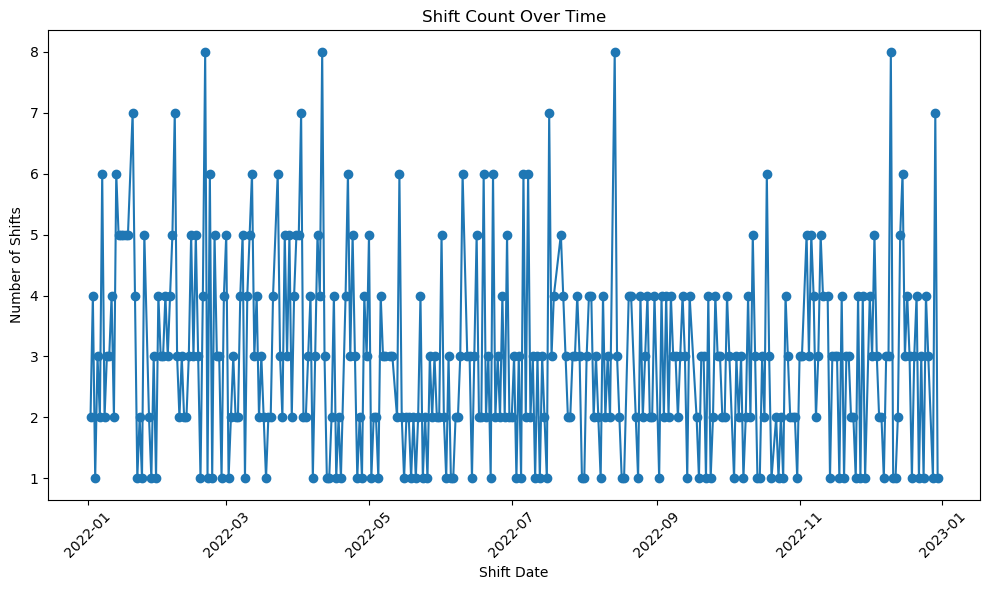

In [22]:
import matplotlib.pyplot as plt

df['shift_date'] = pd.to_datetime(df['shift_date'])

shift_counts = df.groupby('shift_date').size()

plt.figure(figsize=(10, 6))
plt.plot(shift_counts.index, shift_counts.values, marker='o')
plt.xlabel('Shift Date')
plt.ylabel('Number of Shifts')
plt.title('Shift Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


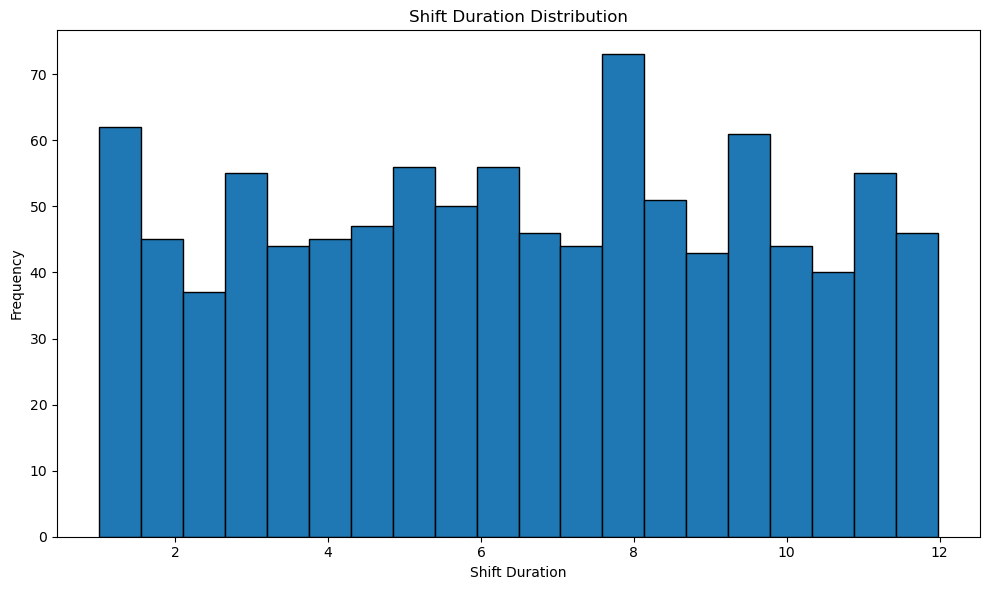

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, edgecolor='black')
plt.xlabel('Shift Duration')
plt.ylabel('Frequency')
plt.title('Shift Duration Distribution')
plt.tight_layout()
plt.show()


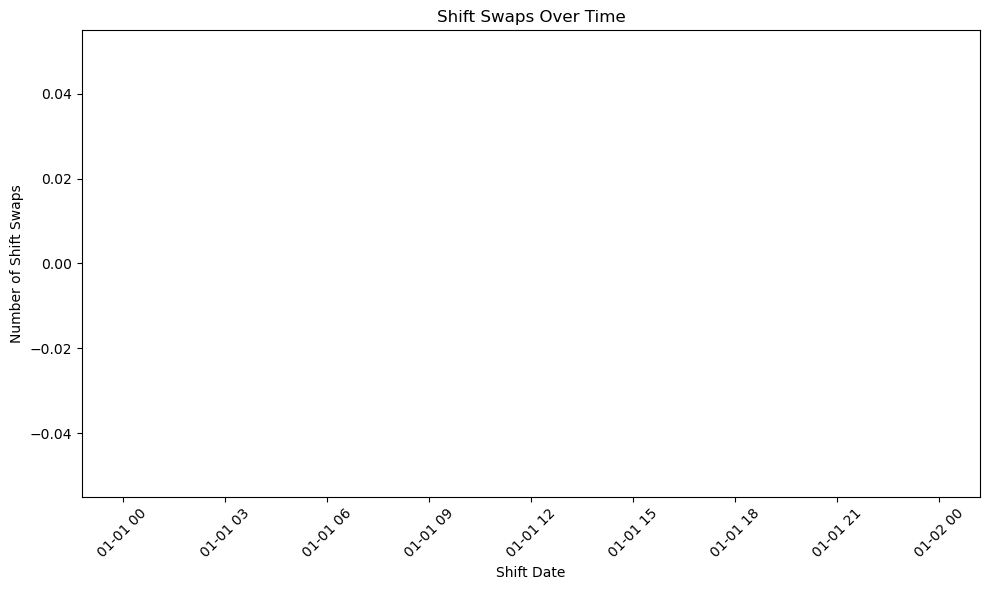

In [24]:
swap_counts = df[df['request_status'] == 'swapped'].groupby('shift_date').size()

plt.figure(figsize=(10, 6))
plt.plot(swap_counts.index, swap_counts.values, marker='o', color='orange')
plt.xlabel('Shift Date')
plt.ylabel('Number of Shift Swaps')
plt.title('Shift Swaps Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
swap_reason_counts = df[df['request_status'] == 'swapped'].groupby('reason').size()

if not swap_reason_counts.empty:
    plt.figure(figsize=(10, 6))
    swap_reason_counts.plot(kind='bar')
    plt.xlabel('Swap Reason')
    plt.ylabel('Number of Swaps')
    plt.title('Shift Swap Reasons')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for shift swap reasons.")


No data available for shift swap reasons.


IndexError: index 0 is out of bounds for axis 0 with size 0

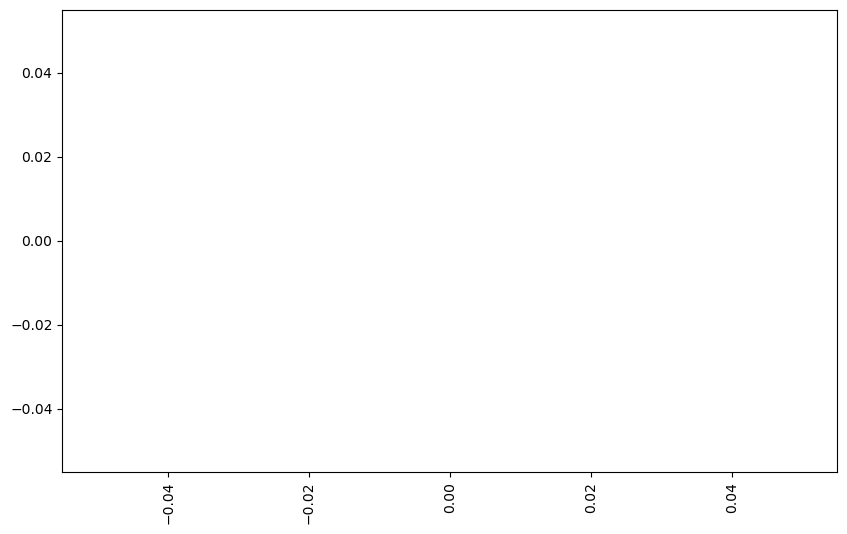

In [27]:
swap_reason_counts = df[df['request_status'] == 'swapped'].groupby('reason').size()

plt.figure(figsize=(10, 6))
swap_reason_counts.plot(kind='bar')
plt.xlabel('Swap Reason')
plt.ylabel('Number of Swaps')
plt.title('Shift Swap Reasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
swap_reason_counts = df[df['request_status'] == 'swapped'].groupby('reason').size()


In [30]:
swap_reason_counts = df[df['request_status'] == 'swapped'].groupby('reason').size()

if not swap_reason_counts.empty:
    plt.figure(figsize=(10, 6))
    swap_reason_counts.plot(kind='bar')
    plt.xlabel('Swap Reason')
    plt.ylabel('Number of Swaps')
    plt.title('Shift Swap Reasons')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for shift swap reasons.")


No data available for shift swap reasons.


In [31]:
swap_reason_counts = df[df['request_status'] == 'swapped'].groupby('reason').size()

if not swap_reason_counts.empty:
    plt.figure(figsize=(10, 6))
    swap_reason_counts.plot(kind='bar')
    plt.xlabel('Swap Reason')
    plt.ylabel('Number of Swaps')
    plt.title('Shift Swap Reasons')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for shift swap reasons.")


No data available for shift swap reasons.


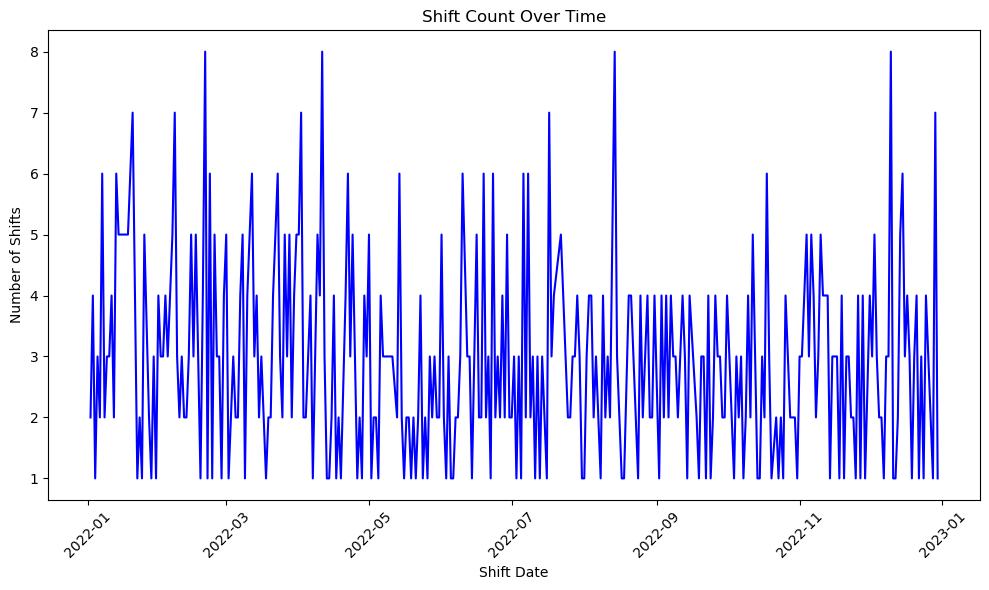

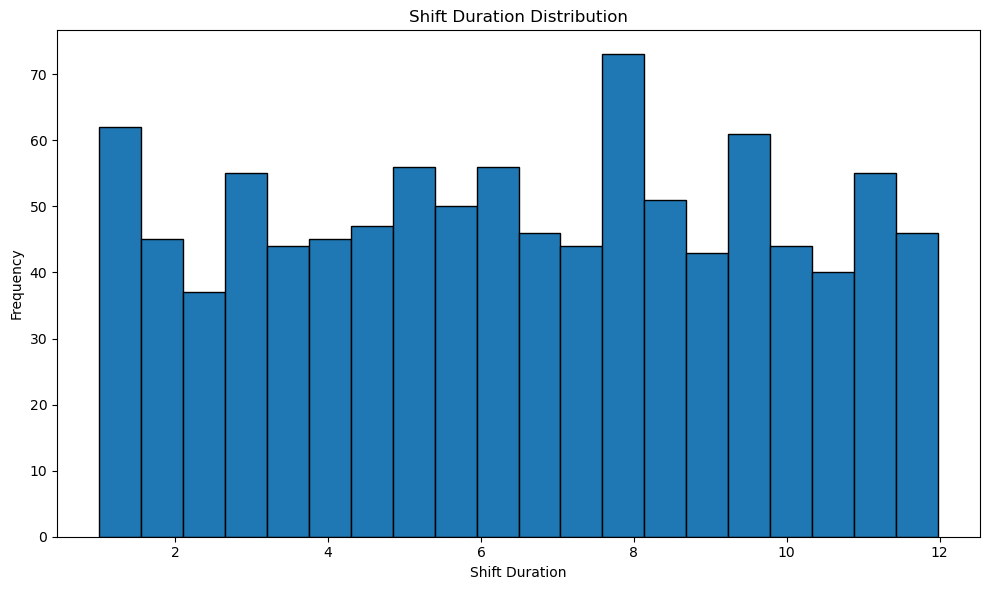

In [37]:
# Plot p1: Shift Count Over Time
p1 = df.groupby('shift_date').size().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(p1['shift_date'], p1[0], color='blue')
plt.xlabel('Shift Date')
plt.ylabel('Number of Shifts')
plt.title('Shift Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot p2: Shift Duration Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, edgecolor='black')
plt.xlabel('Shift Duration')
plt.ylabel('Frequency')
plt.title('Shift Duration Distribution')
plt.tight_layout()
plt.show()


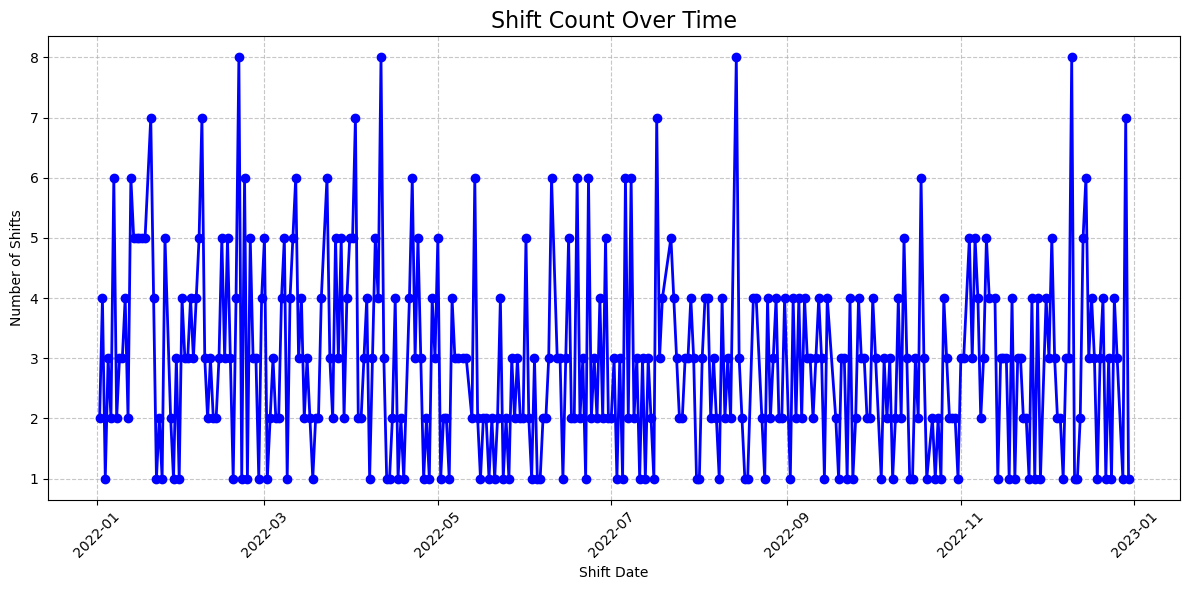

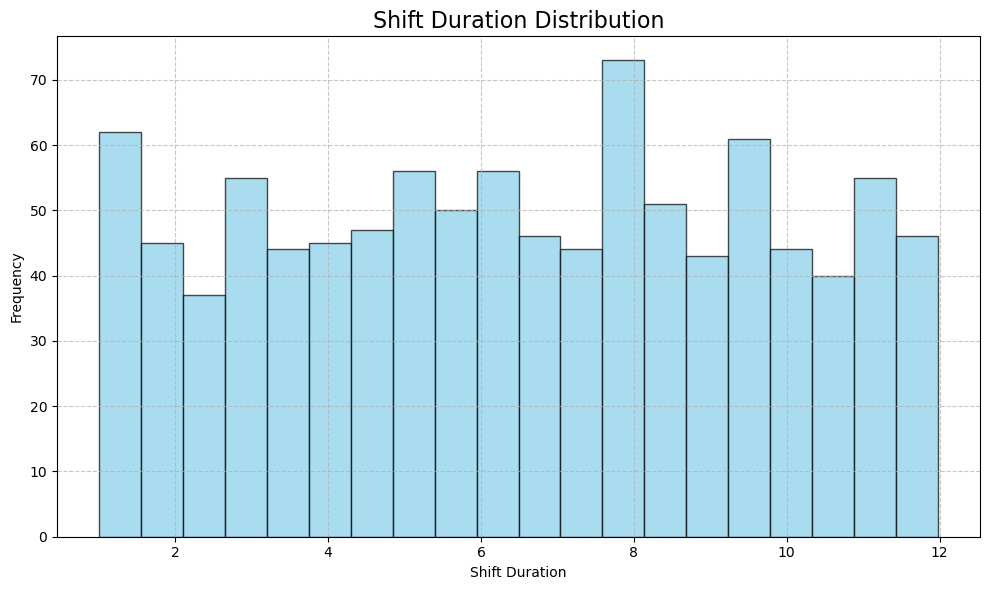

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Plot p1: Shift Count Over Time
p1 = df.groupby('shift_date').size().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(p1['shift_date'], p1[0], color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Shift Date')
plt.ylabel('Number of Shifts')
plt.title('Shift Count Over Time', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot p2: Shift Duration Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Shift Duration')
plt.ylabel('Frequency')
plt.title('Shift Duration Distribution', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Define the date range for filtering
start_date = pd.to_datetime("2016-04-15")
end_date = pd.to_datetime("2016-06-15")

# Filter the data for the specified date range
filtered_df = df[(df['shift_date'] > start_date) & (df['shift_date'] < end_date)]

# Group by shift_date and calculate the sum of durations
grouped_df = filtered_df.groupby('shift_date')['duration'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Smooth the data using make_interp_spline
x_new = np.linspace(grouped_df['shift_date'].min(), grouped_df['shift_date'].max(), 300)
spl = make_interp_spline(grouped_df['shift_date'], grouped_df['duration'], k=3)
y_smooth = spl(x_new)

# Plot the original data as scatter points
plt.scatter(grouped_df['shift_date'], grouped_df['duration'], color='gray', label='Data Points', s=20)

# Plot the smoothed line
plt.plot(x_new, y_smooth, color='blue', label='Smoothed Line', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.title('Total Duration Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


TypeError: Cannot interpret 'NaT' as a data type

<Figure size 1000x600 with 0 Axes>

In [41]:
plt.scatter(grouped_df_cleaned['shift_date'], grouped_df_cleaned['duration'], color='gray', label='Data Points', s=20)

# Plot the smoothed line
plt.plot(x_new, y_smooth, color='blue', label='Smoothed Line', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.title('Total Duration Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'grouped_df_cleaned' is not defined

/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Predicti

ValueError: too many values to unpack (expected 3)

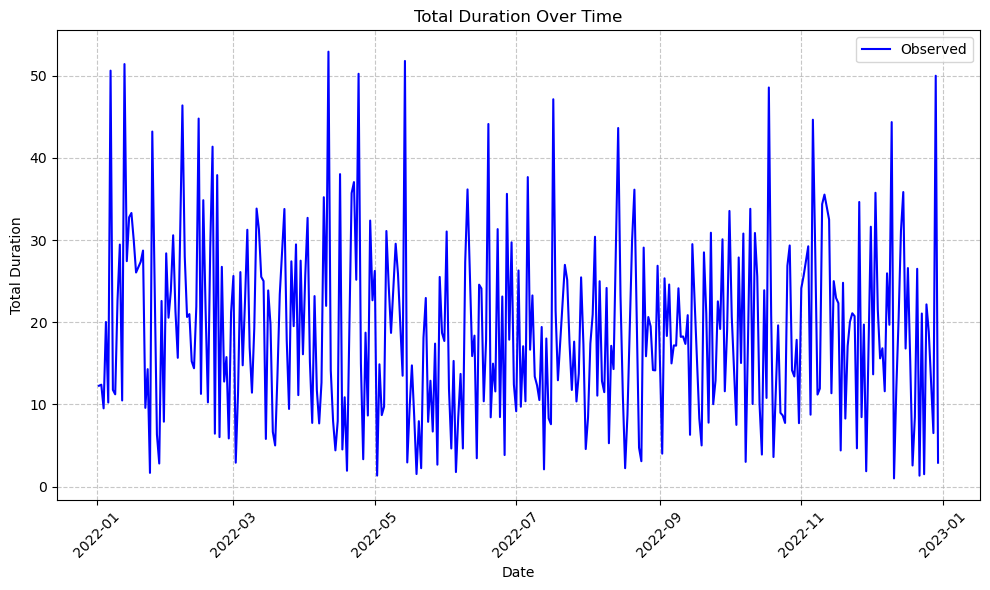

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Group by shift_date and calculate the sum of durations
grouped_df = df.groupby('shift_date')['duration'].sum().reset_index()

# Set 'shift_date' as the index
grouped_df.set_index('shift_date', inplace=True)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['duration'], color='blue', label='Observed')
plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.title('Total Duration Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Perform time series forecasting using ARIMA
model = sm.tsa.ARIMA(grouped_df['duration'], order=(1, 1, 1))
results = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast, stderr, conf_int = results.forecast(steps=forecast_steps, alpha=0.05)

# Create date range for the forecast period
forecast_dates = pd.date_range(start=grouped_df.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['duration'], color='blue', label='Observed')
plt.plot(forecast_dates[1:], forecast, color='red', label='Forecast')
plt.fill_between(forecast_dates[1:], forecast - 1.96 * stderr, forecast + 1.96 * stderr, color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.title('Total Duration Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


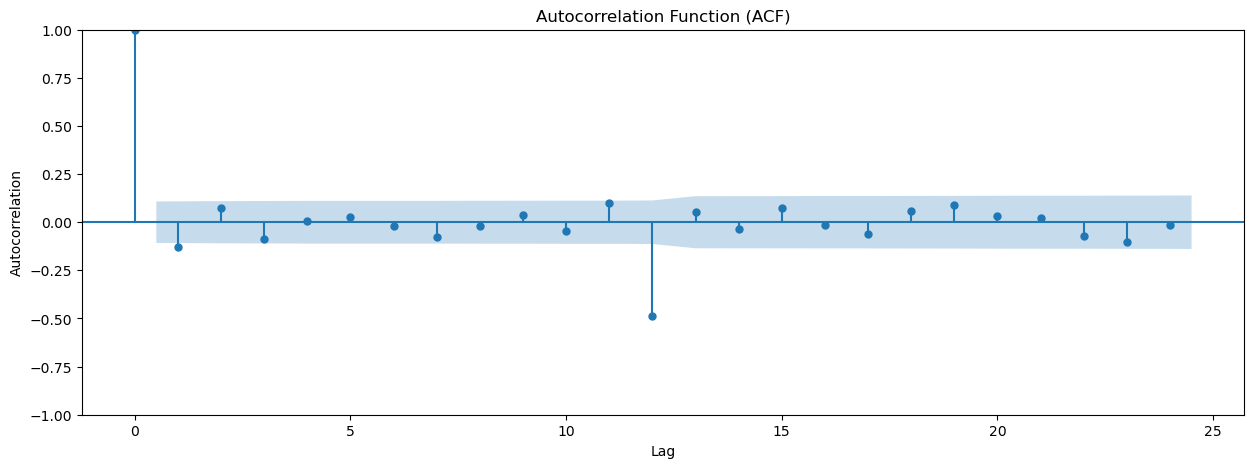

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Group by shift_date and calculate the sum of durations
grouped_df = df.groupby('shift_date')['duration'].sum().reset_index()

# Set 'shift_date' as the index
grouped_df.set_index('shift_date', inplace=True)

# Calculate the seasonal difference (e.g., difference between consecutive months)
grouped_df['seasonal_difference'] = grouped_df['duration'].diff(periods=12)

# Plot the ACF for the seasonal difference
plt.figure(figsize=(15, 5))
plot_acf(grouped_df['seasonal_difference'].dropna(), lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()


In [46]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Group by shift_date and calculate the sum of durations
grouped_df = df.groupby('shift_date')['duration'].sum().reset_index()

# Set 'shift_date' as the index
grouped_df.set_index('shift_date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(grouped_df) * 0.8)  # 80% for training
train = grouped_df.iloc[:train_size]
test = grouped_df.iloc[train_size:]

# Define SARIMA order and trend parameters
p_param = 2  # Replace with the appropriate value

# Fit SARIMA model
model = SARIMAX(train, order=(p_param, 0, 0), trend="c")
model_fit = model.fit(disp=0)

# Display model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               duration   No. Observations:                  273
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1041.681
Date:                Fri, 25 Aug 2023   AIC                           2091.361
Time:                        03:44:24   BIC                           2105.799
Sample:                             0   HQIC                          2097.157
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.7324      1.816     10.867      0.000      16.174      23.291
ar.L1         -0.0655      0.067     -0.984      0.325      -0.196       0.065
ar.L2          0.0206      0.058      0.356      0.7

/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

/Users/alirazi/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
